In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>Road Accident Data Analysis</h1>
<h3>Analyst: Ian Genesis Minorca</h3>

In [2]:
acci = pd.read_csv('accident_data.csv')
acci

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], errors = "coerce")
acci.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [4]:
acci['Accident Date']

0        2019-05-06
1        2019-02-07
2               NaT
3               NaT
4        2019-03-09
            ...    
660674          NaT
660675          NaT
660676          NaT
660677          NaT
660678          NaT
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

In [5]:
df_categor = acci.dropna(subset=["Accident_Severity", "Number_of_Casualties", "Number_of_Vehicles"])
df_categor

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Cleansing</h1>

In [6]:
acci['Latitude'] =  acci['Latitude'].fillna(acci['Latitude'].mode()[0])
acci['Longitude'] =  acci['Longitude'].fillna(acci['Longitude'].mode()[0])
acci['Road_Surface_Conditions'] =  acci['Road_Surface_Conditions'].fillna('Unknown Surface Conditiion')
acci['Road_Type'] =  acci['Road_Type'].fillna('Unaccounted')
acci['Weather_Conditions'] =  acci['Weather_Conditions'].fillna('Unaccounted')
acci['Urban_or_Rural_Area'] =  acci['Urban_or_Rural_Area'].fillna(acci['Urban_or_Rural_Area'].mode()[0])

In [7]:
acci['Accident_Severity'] = acci['Accident_Severity'].astype('category')
acci['Latitude'] = acci['Latitude'].astype('category')
acci['Light_Conditions'] = acci['Light_Conditions'].astype('category')
acci['District Area'] = acci['District Area'].astype('category')
acci['Longitude'] = acci['Longitude'].astype('category')
acci['Road_Surface_Conditions'] = acci['Road_Surface_Conditions'].astype('category')
acci['Road_Type'] = acci['Road_Type'].astype('category')
acci['Urban_or_Rural_Area'] = acci['Urban_or_Rural_Area'].astype('category')
acci['Weather_Conditions'] = acci['Weather_Conditions'].astype('category')
acci['Vehicle_Type'] = acci['Vehicle_Type'].astype('category')

In [8]:
acci.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting Date Info with Pandas date/time</h1>

In [9]:
acci['Year'] = acci['Accident Date'].dt.year
acci['Month'] = acci['Accident Date'].dt.month
acci['Day'] = acci['Accident Date'].dt.day
acci['DayOfweek'] = acci['Accident Date'].dt.dayofweek
acci.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfweek                  395672
dtype: int64

<h1 style="color:yellow;">Insight 1</h1>
<h3>Most Serious Accidents based on lighting</h3>

In [10]:
acci[acci['Accident_Severity'] == 'Serious']['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

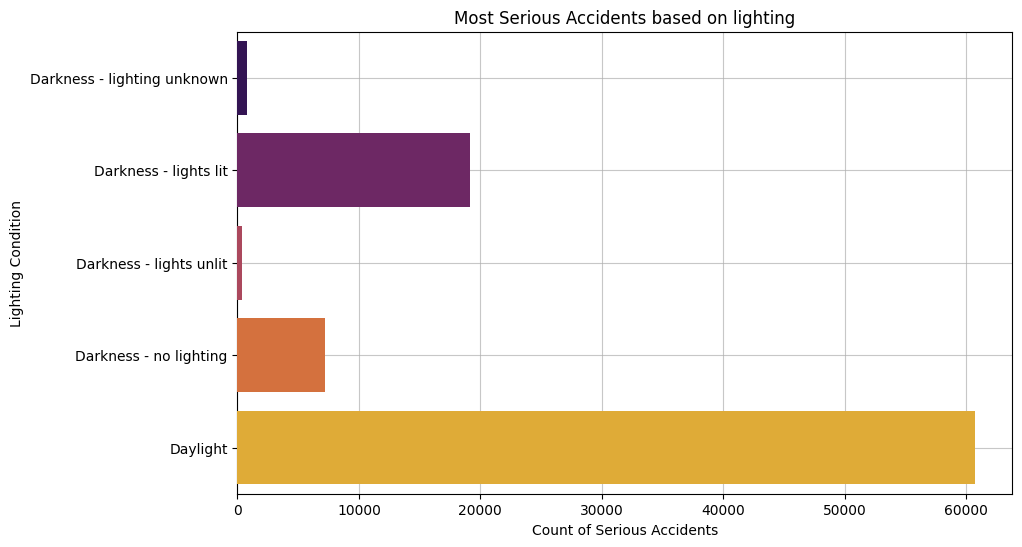

In [51]:
serious_counts = acci[acci['Accident_Severity'] == 'Serious']['Light_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=serious_counts.index, x=serious_counts.values, palette="inferno", zorder=3)

plt.title("Most Serious Accidents based on lighting")
plt.grid(True, linestyle="-", alpha=0.7, zorder=0)
plt.xlabel("Count of Serious Accidents")
plt.ylabel("Lighting Condition")
plt.show()

<h1 style="color:yellow;">Insight 2</h1>
<h3>Distribution of accident severity</h3>

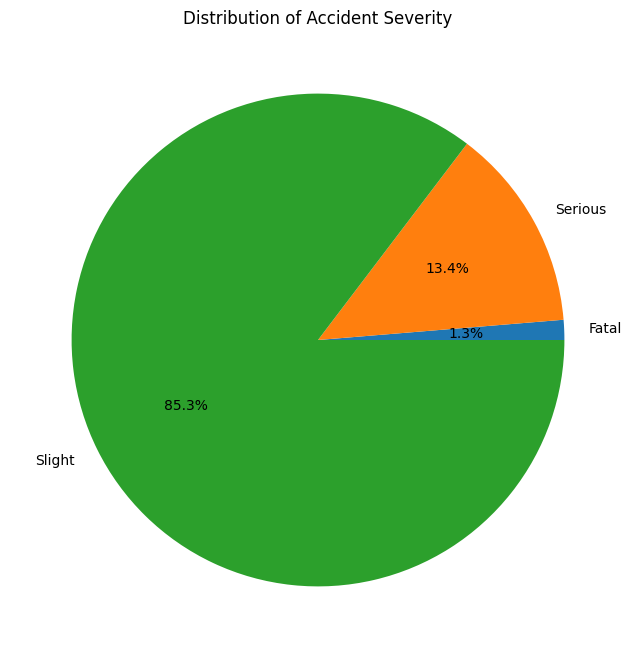

In [12]:
# severity_counts = acci["Accident_Severity"].value_counts().T
# severity_counts
sev = acci.groupby(['Accident_Severity'])['Number_of_Casualties'].count()

plt.figure(figsize=(8, 8))
plt.pie(sev, labels=sev.index, autopct='%1.1f%%')

plt.title('Distribution of Accident Severity')
plt.show()

<h1 style="color:yellow;">Insight 3</h1>
<h3>Most common road type where accidents occur</h3>

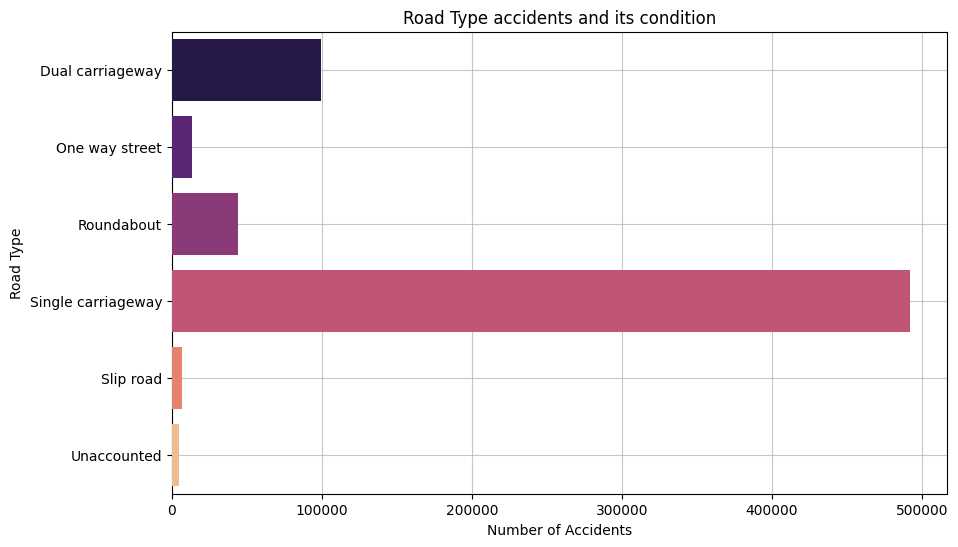

In [13]:
most_common_road = acci.groupby(["Road_Type"])["Road_Surface_Conditions"].count()
plt.figure(figsize=(10, 6))
sns.barplot(y=most_common_road.index, x=most_common_road.values, palette="magma", zorder=3)

plt.title("Road Type accidents and its condition")
plt.grid(True, linestyle="-", alpha=0.7, zorder=0)
plt.xlabel("Number of Accidents")
plt.ylabel("Road Type")
plt.show()

<h1 style="color:yellow;">Insight 4</h1>
<h3>Number of accidents per district (top 5)</h3>

In [14]:
area_yr = acci.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
pervert_table = area_yr.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pervert_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134,201,75,115,52,146,120,120,129,158,...,162,273,92,109,132,135,170,127,97,194
2020.0,203,299,78,138,46,137,116,109,135,145,...,153,259,85,101,156,177,190,124,95,172
2021.0,204,257,66,111,9,129,94,110,152,139,...,125,255,92,111,126,138,171,130,96,215
2022.0,0,0,46,79,0,107,0,0,139,104,...,101,214,82,82,120,101,164,115,93,171


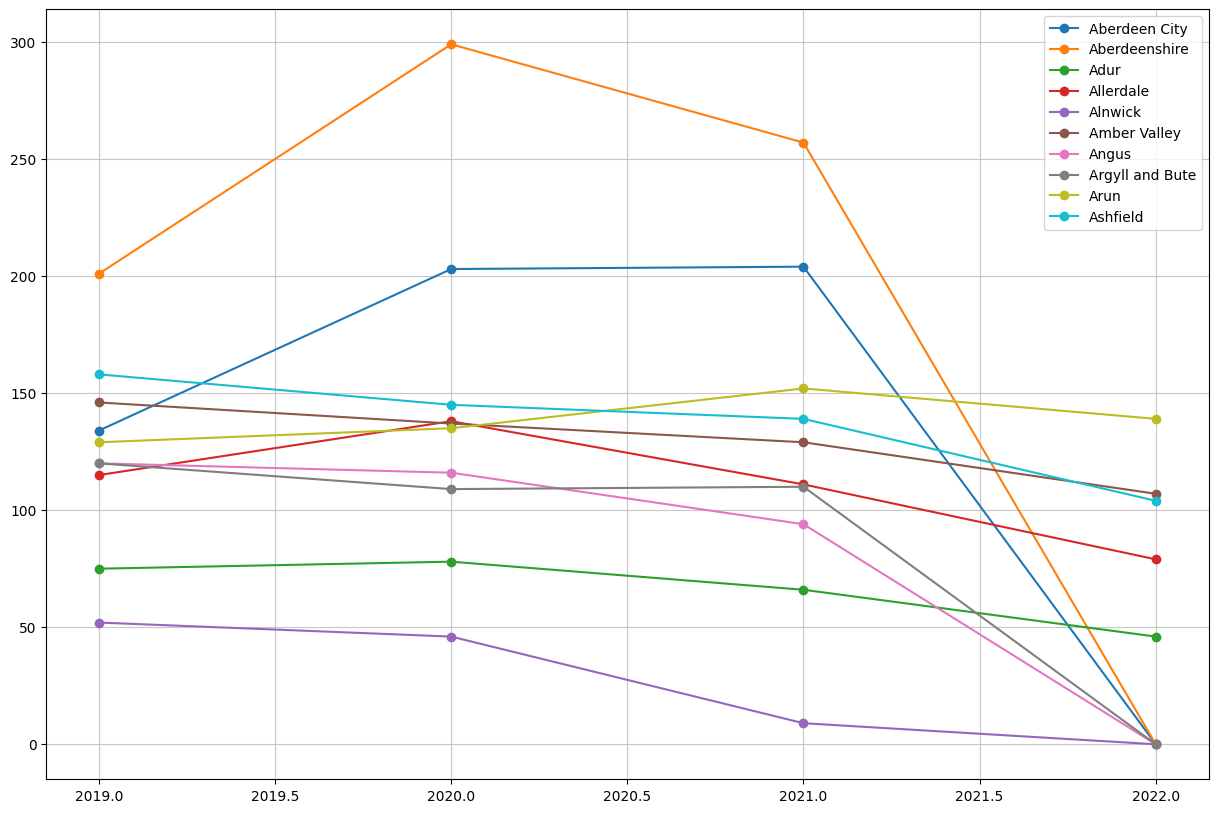

In [15]:
count = 0
for x in pervert_table:
    count += 1
    plt.plot(pervert_table.index,pervert_table[x], label = x, marker = 'o', zorder=3)
    if count == 10:
        break
plt.gcf().set_size_inches(15,10)
plt.grid(True, linestyle="-", alpha=0.7, zorder=0)
plt.legend()
plt.show()

<h1 style="color:yellow;">Insight 5</h1>
<h3>Most common vehicle type involved in accidents</h3>

In [16]:
common_vehicle = acci["Vehicle_Type"].mode()[0]
common_vehicle

'Car'

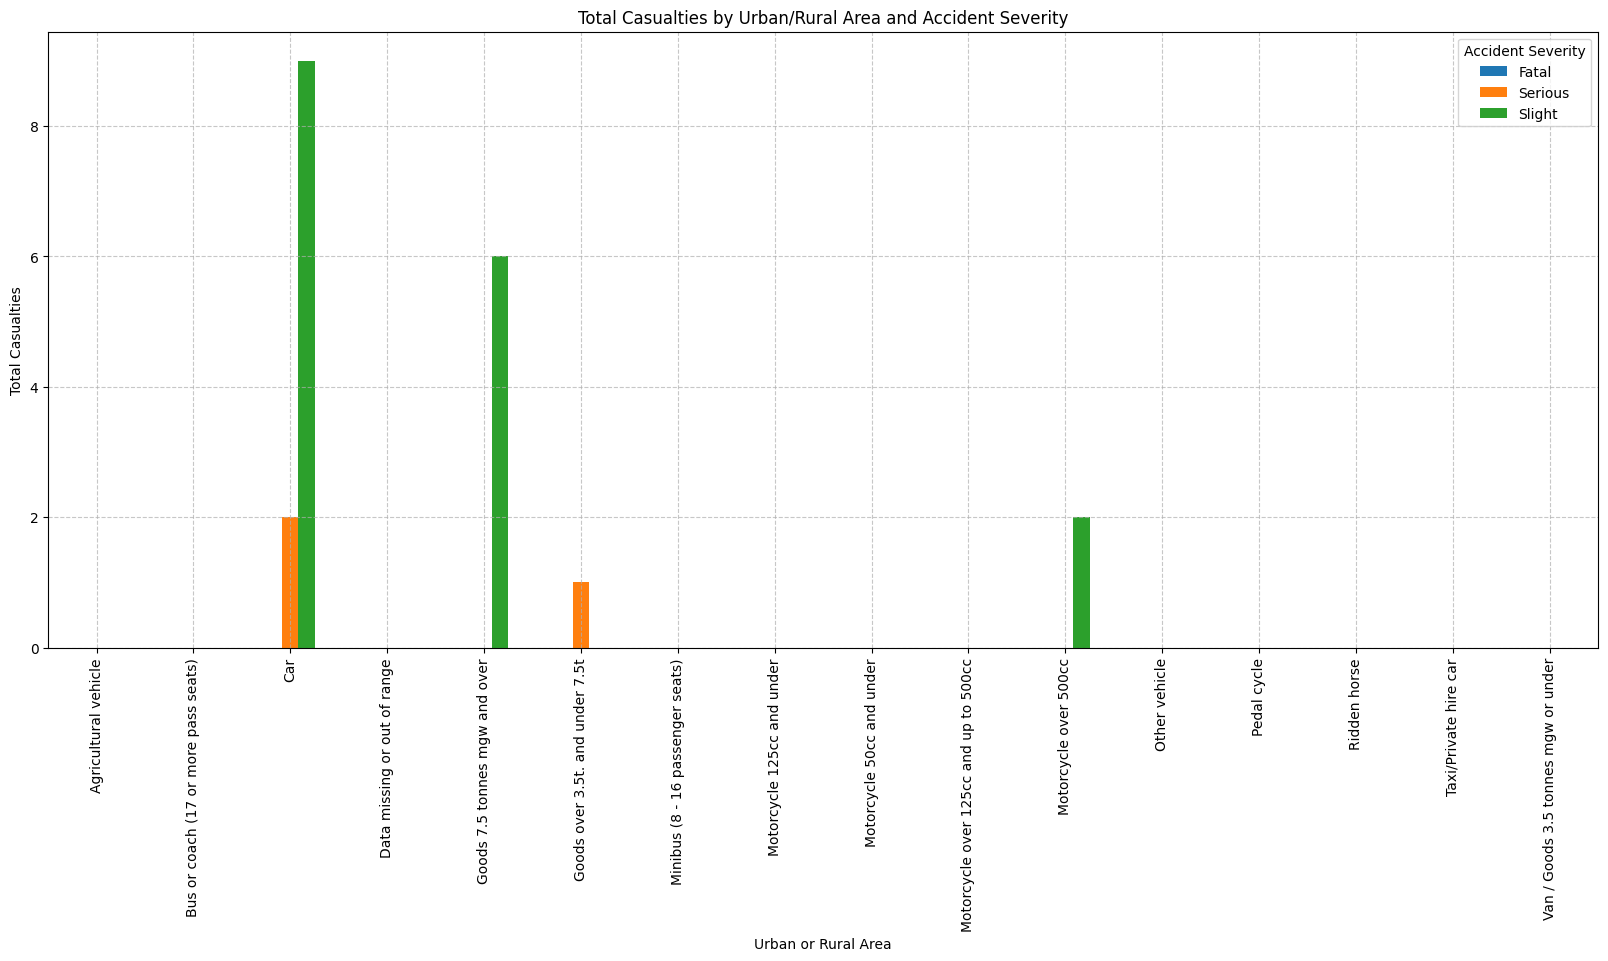

In [17]:
acci_20 = acci[acci['Year'] == 2020].head(15)
acci_df = acci_20.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
pivot_df = acci_df.pivot(index='Vehicle_Type', columns='Accident_Severity', values='Number_of_Casualties')

# pivot_df.plot(kind='bar', figsize=(10, 6))
pivot_df.plot(kind='bar')
plt.grid(True, linestyle="--", alpha=0.7, zorder=0)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,8)
plt.legend(title="Accident Severity")
plt.ylabel("Total Casualties")
plt.xlabel("Urban or Rural Area")
plt.title("Total Casualties by Urban/Rural Area and Accident Severity")
plt.show()

<h1 style="color:yellow;">Insight 6</h1>
<h3>Number of accidents over the years</h3>

In [18]:
yr_acci = acci["Accident Date"].dt.year.value_counts().sort_index()
yr_acci

Accident Date
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

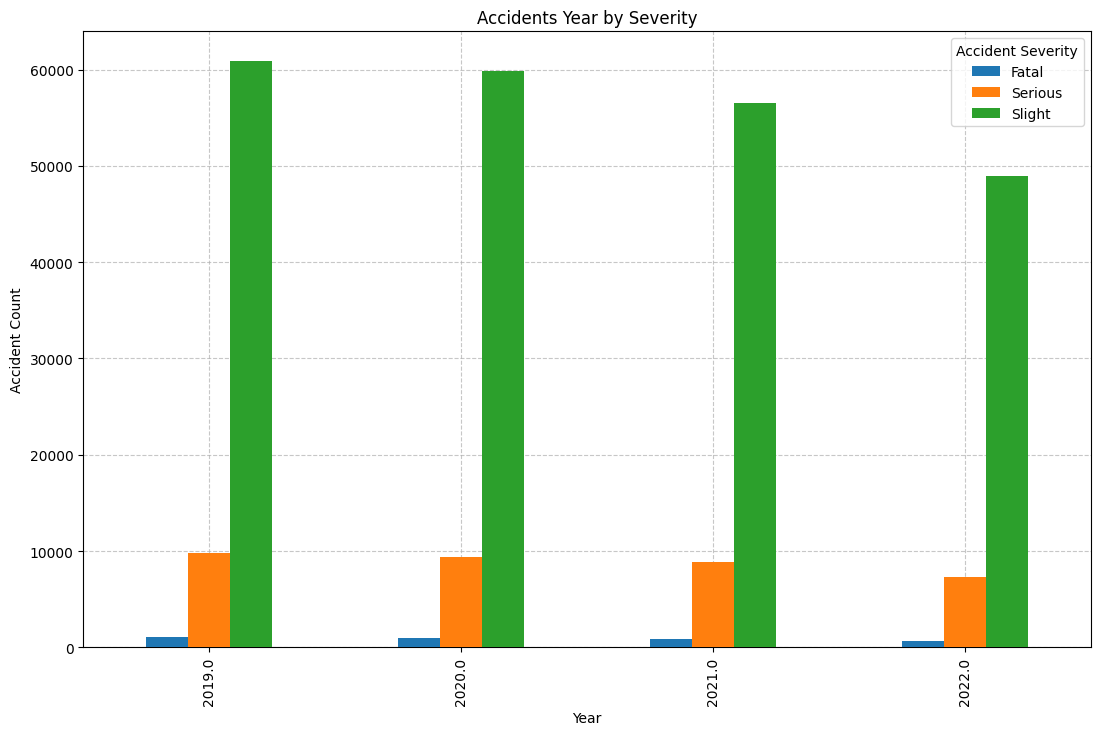

In [19]:
# month_labels = ["January", "February", "March", "April", "May", "June",
#                 "July", "August", "September", "October", "November", "December"]

acci_yr = acci.groupby(['Year', 'Accident_Severity']).size().unstack().fillna(0)
ax = acci_yr.plot(kind='bar', figsize=(13, 8), zorder=3)
plt.title('Accidents Year by Severity')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True, linestyle="--", alpha=0.7, zorder=0)
plt.legend(title='Accident Severity')
plt.show()

<h1 style="color:yellow;">Insight 7</h1>
<h3>Day of the week with the most accidents</h3>

In [20]:
mostday = acci["Accident Date"].dt.day_name().mode()[0]
mostday

'Tuesday'

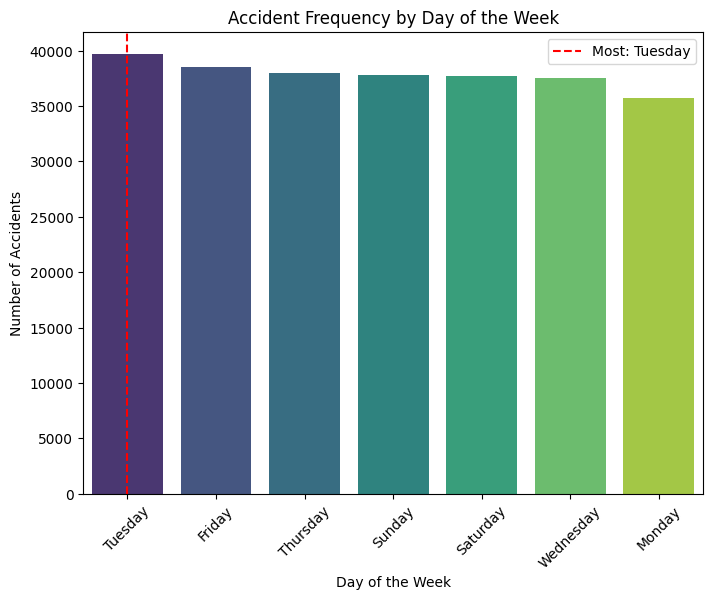

In [21]:
day_counts = acci["Accident Date"].dt.day_name().value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
mostday = day_counts.idxmax()
plt.axvline(x=list(day_counts.index).index(mostday), color='red', linestyle='--', label=f"Most: {mostday}")

plt.title("Accident Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h1 style="color:yellow;">Insight 8</h1>
<h3>Maximum casualties recorded in a single accident</h3>

In [22]:
max_casualties = acci["Number_of_Casualties"].max()
max_casualties 

np.int64(68)

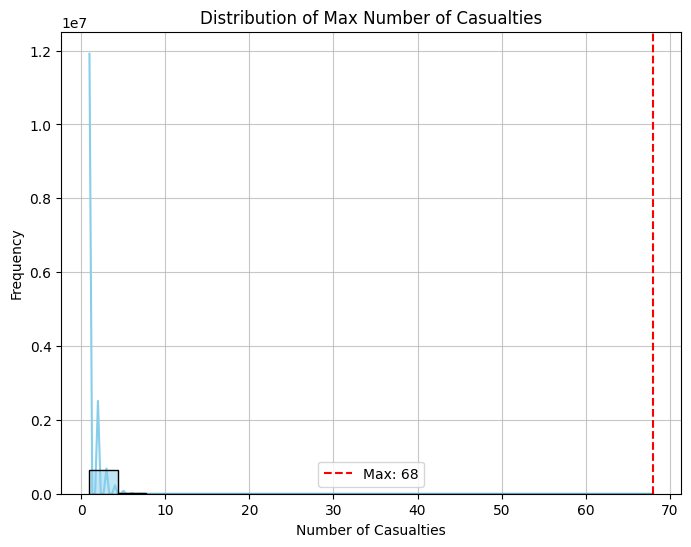

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(acci["Number_of_Casualties"], bins=20, kde=True, color="skyblue", zorder=3)
max_casualties = acci["Number_of_Casualties"].max()
plt.axvline(max_casualties, color='red', linestyle="--", label=f"Max: {max_casualties}")
plt.grid(True, linestyle="-", alpha=0.7, zorder=0)
plt.title("Distribution of Max Number of Casualties")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<h1 style="color:yellow;">Insight 9</h1>
<h3>Correlation between number of vehicles and casualties</h3>

In [24]:
corre = acci[["Number_of_Casualties", "Number_of_Vehicles"]].corr().iloc[0, 1]
corre>0.05

np.True_

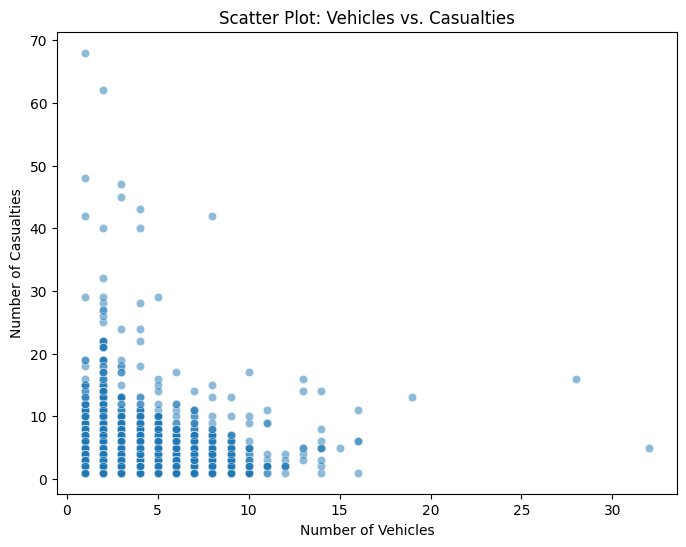

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=acci["Number_of_Vehicles"], y=acci["Number_of_Casualties"], alpha=0.5)

plt.title("Scatter Plot: Vehicles vs. Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")

plt.show()

<h1 style="color:yellow;">Insight 10</h1>
<h3>Proportion of urban vs rural accidents</h3>

In [26]:
ur_ru = acci["Urban_or_Rural_Area"].value_counts(normalize=True) * 100
ur_ru

Urban_or_Rural_Area
Urban          63.824944
Rural          36.173391
Unallocated     0.001665
Name: proportion, dtype: float64

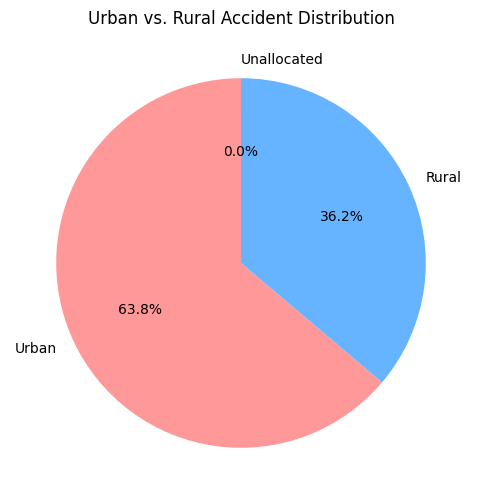

In [60]:
plt.figure(figsize=(6, 6))
ur_ru.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)

plt.title("Urban vs. Rural Accident Distribution")
plt.ylabel("")

plt.show()

<h1 style="color:yellow;">Insight 11</h1>
<h3>Most common weather condition</h3>

In [73]:
common_weather = acci["Weather_Conditions"].value_counts()
common_weather

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

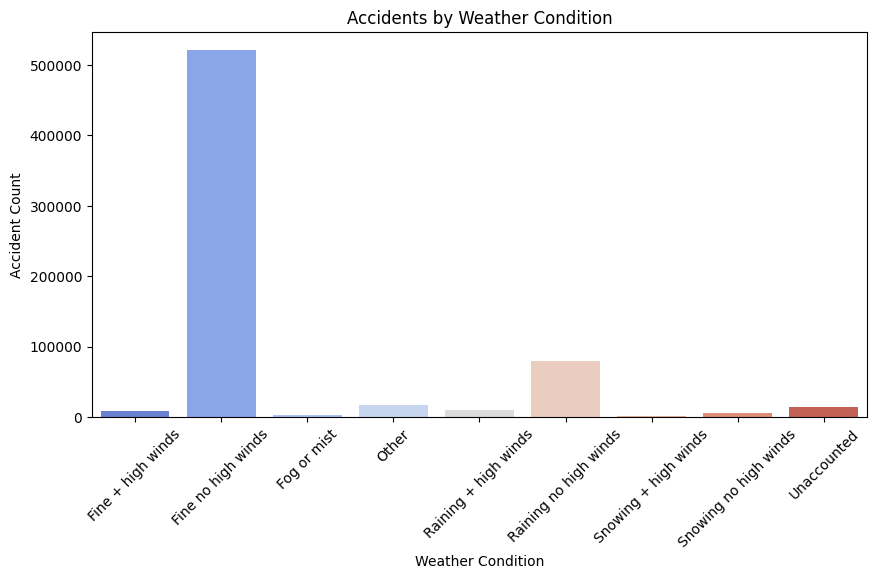

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(x=common_weather.index, y=common_weather.values, palette="coolwarm")

plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)

plt.show()

<h1 style="color:yellow;">Insight 12</h1>
<h3>Average number of casualties per accident</h3>

In [28]:
avg_cas = acci["Number_of_Casualties"].mean()
avg_cas

np.float64(1.357040257068864)

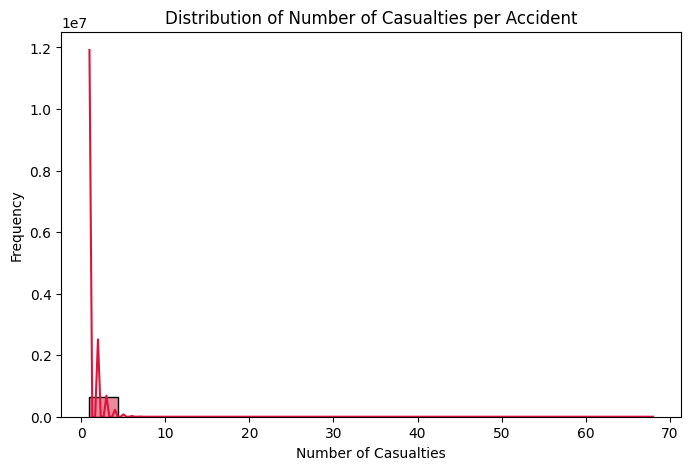

In [101]:
plt.figure(figsize=(8, 5))
sns.histplot(acci["Number_of_Casualties"], bins=20, kde=True, color="crimson")

plt.title("Distribution of Number of Casualties per Accident")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")

plt.show()

<h1 style="color:yellow;">Insight 13</h1>
<h3>Accidents in 2020</h3>

In [29]:
acci_20 = acci[acci['Year'] == 2020].head(15)
acci_20

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfweek
182120,200801BS70001,Serious,2020-02-01,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,2.0,1.0,5.0
182121,200801BS70002,Slight,2020-06-01,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,6.0,1.0,0.0
182122,200801BS70003,Serious,2020-12-01,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,12.0,1.0,1.0
182123,200801BS70004,Slight,2020-05-01,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,5.0,1.0,4.0
182124,200801BS70005,Slight,2020-03-01,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,3.0,1.0,6.0
182125,200801BS70006,Serious,2020-07-01,51.494069,Daylight,Kensington and Chelsea,-0.158271,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods over 3.5t. and under 7.5t,2020.0,7.0,1.0,2.0
182126,200801BS70007,Slight,2020-04-01,51.482141,Darkness - lights lit,Kensington and Chelsea,-0.183380,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Motorcycle over 500cc,2020.0,4.0,1.0,2.0
182127,200801BS70008,Slight,2020-04-01,51.515424,Darkness - lights lit,Kensington and Chelsea,-0.213332,2,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Goods 7.5 tonnes mgw and over,2020.0,4.0,1.0,2.0
182128,200801BS70009,Slight,2020-07-01,51.478418,Daylight,Kensington and Chelsea,-0.181080,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,7.0,1.0,2.0
182129,200801BS70010,Slight,2020-07-01,51.488522,Darkness - lights lit,Kensington and Chelsea,-0.165841,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,7.0,1.0,2.0


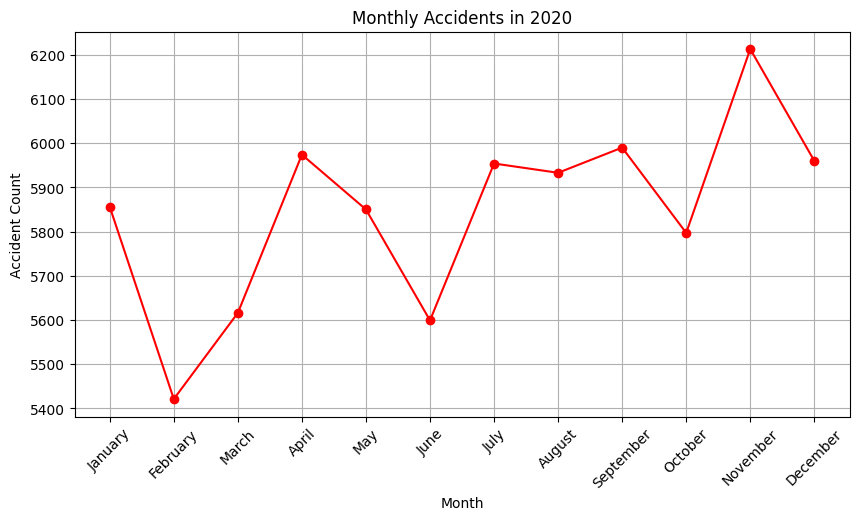

In [100]:
acci_2020 = acci[acci['Year'] == 2020].groupby("Month")["Year"].count()
month_labels = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(10, 5))
acci_2020.plot(kind="line", marker="o", color="red", zorder=3)
plt.grid(True, zorder=0)
plt.title("Monthly Accidents in 2020")
plt.xlabel("Month")
plt.ylabel("Accident Count")
plt.xticks(range(1, 13), labels=month_labels, rotation=45)

plt.show()

<h1 style="color:yellow;">Insight 14</h1>
<h3>20 Accident Peak Dates</h3>

In [70]:
hr = acci['Accident Date'].value_counts().head(20)
print(f"These are the peak accident dates:\n{hr}")

These are the peak accident dates:
Accident Date
2021-11-02    685
2021-06-10    680
2019-06-12    678
2019-01-02    676
2021-04-12    667
2021-12-11    659
2019-05-10    657
2022-01-10    656
2019-12-12    655
2019-11-12    653
2019-02-02    652
2020-05-09    648
2021-03-11    646
2019-03-12    645
2020-11-01    644
2019-09-10    634
2020-05-12    633
2022-01-02    631
2021-11-12    630
2019-02-05    629
Name: count, dtype: int64


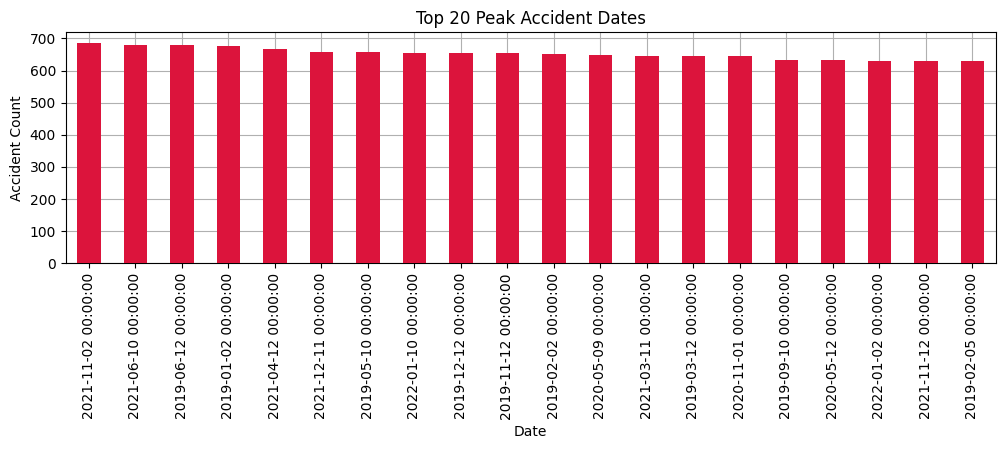

In [108]:
plt.figure(figsize=(12, 3))
hr.plot(kind="bar", color="crimson", zorder=3)
plt.grid(True, linestyle='-')
plt.title("Top 20 Peak Accident Dates")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.xticks(rotation=90)
plt.show()

<h1 style="color:yellow;">Insight 15</h1>
<h3>Percentage of accidents per month</h3>

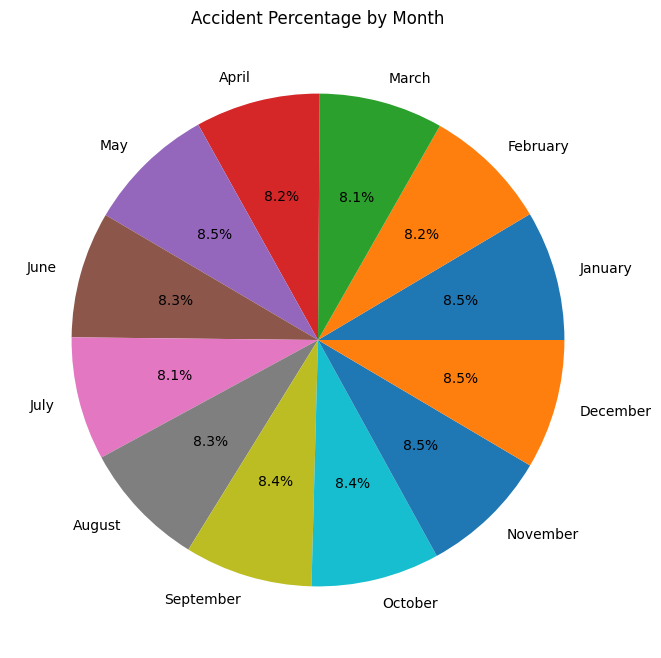

In [58]:
month_labels = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

acci_total = acci_month.sum(axis=1)

acci_total.index = acci_total.index.map(month_labels)

plt.figure(figsize=(8, 8))
plt.pie(acci_total, labels=acci_total.index, autopct='%1.1f%%')

plt.title('Accident Percentage by Month')
plt.show()

<h1 style="color:yellow;">Insight 16</h1>
<h3>Accident in Dry Roads</h3>

In [32]:
i = acci[acci['Road_Surface_Conditions'] == "Dry"]
i

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfweek
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,5.0,6.0,0.0
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Unaccounted,Urban,Unaccounted,Taxi/Private hire car,NaN,NaN,NaN,NaN
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Unaccounted,Urban,Unaccounted,Other vehicle,2019.0,3.0,9.0,5.0
5,200701BS67159,Serious,NaT,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660648,201091NL06327,Slight,2022-12-11,60.157151,Daylight,Shetland Islands,-1.146277,1,1,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022.0,12.0,11.0,6.0
660649,201091NL06425,Slight,NaT,60.189955,Darkness - no lighting,Shetland Islands,-1.224047,1,2,Dry,Single carriageway,Rural,Unaccounted,Car,NaN,NaN,NaN,NaN
660651,201091NL06820,Slight,2022-04-12,60.154438,Darkness - lights lit,Shetland Islands,-1.143285,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022.0,4.0,12.0,1.0
660670,201091NM00939,Slight,NaT,57.574536,Darkness - lights lit,Highland,-3.892627,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN


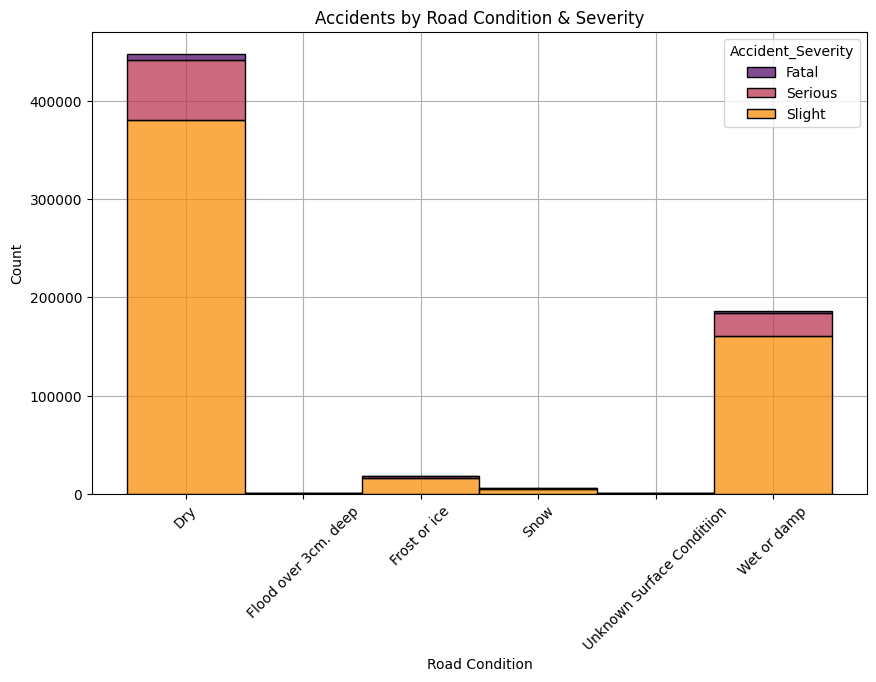

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=acci, x="Road_Surface_Conditions", hue="Accident_Severity", multiple="stack", palette="inferno", zorder=10)
plt.grid(True, zorder=0)
plt.xticks(rotation=45)
plt.title("Accidents by Road Condition & Severity")
plt.xlabel("Road Condition")
plt.ylabel("Count")

plt.show()

<h1 style="color:yellow;">Insight 17</h1>
<h3>The number of casualties in a certain vehicle and the weather conditions</h3>

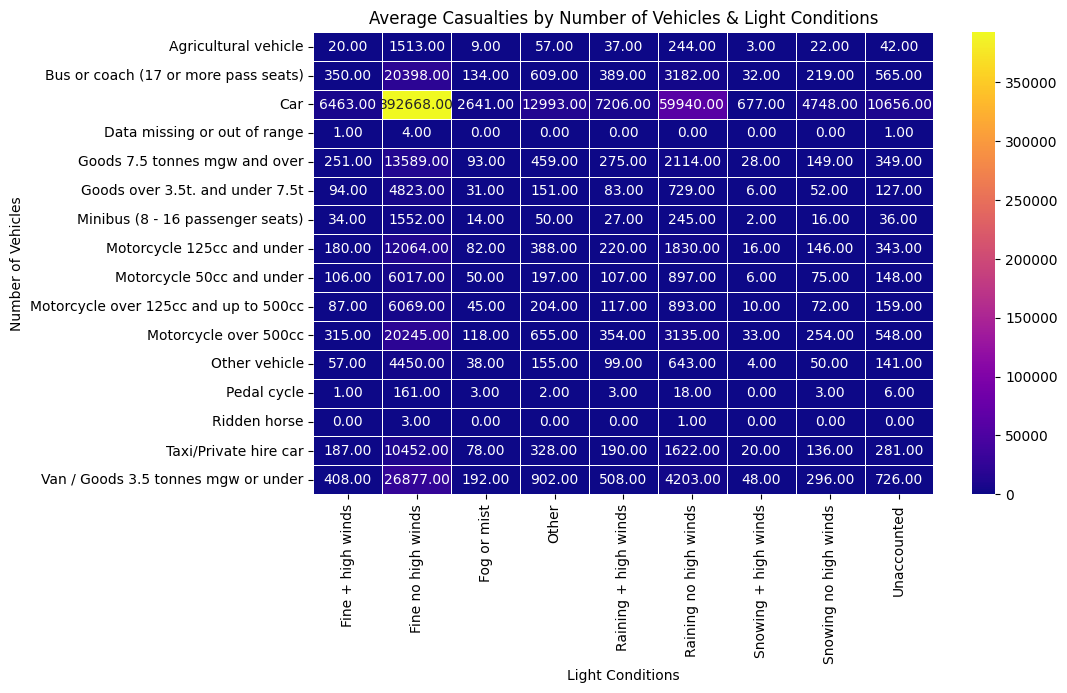

In [56]:
e = acci.groupby(['Vehicle_Type', 'Weather_Conditions'])['Number_of_Casualties'].count().unstack()
e

plt.figure(figsize=(10, 6))
sns.heatmap(e, cmap="plasma", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Average Casualties by Number of Vehicles & Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Vehicles")

plt.show()

<h1 style="color:yellow;">Insight 18</h1>
<h3>Road Casualties</h3>

In [34]:
acci_roadz = acci['Road_Type'].value_counts().rank()
acci_roadz

Road_Type
Single carriageway    6.0
Dual carriageway      5.0
Roundabout            4.0
One way street        3.0
Slip road             2.0
Unaccounted           1.0
Name: count, dtype: float64

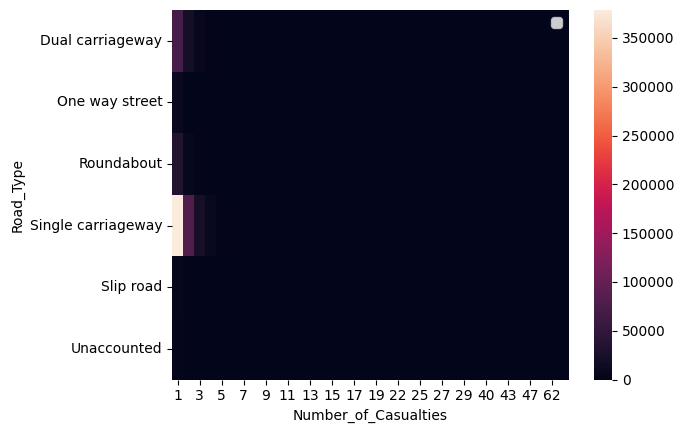

In [45]:
mainit_road = acci.groupby(['Road_Type', 'Number_of_Casualties']).size().unstack()
sns.heatmap(mainit_road)
plt.legend()
plt.show()

<h1 style="color:yellow;">Insight 19</h1>
<h3>Does Light Conditions affect the prone of accidents?</h3>

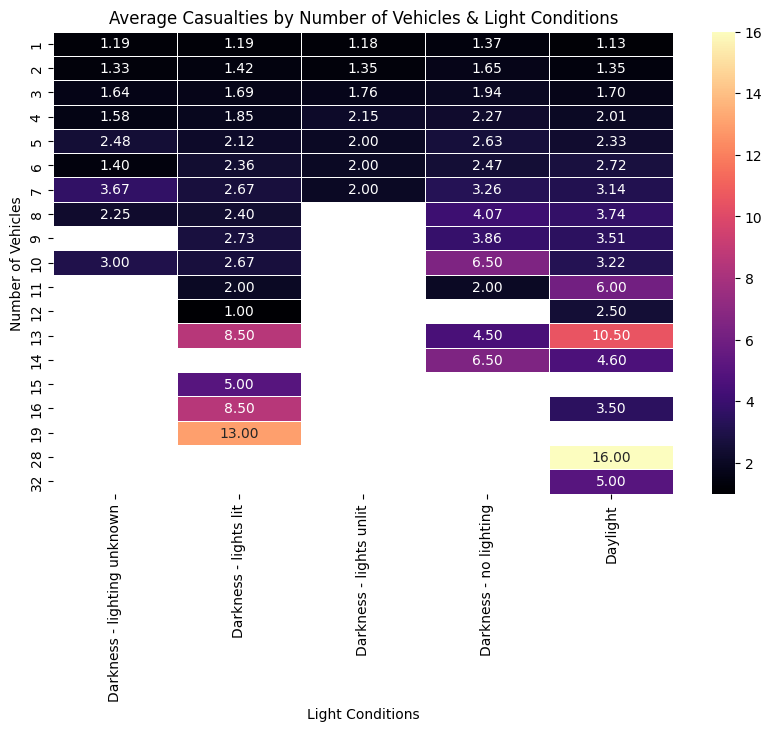

In [118]:
r = acci.groupby(['Number_of_Vehicles', 'Light_Conditions'])['Number_of_Casualties'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(r, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Average Casualties by Number of Vehicles & Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Vehicles")

plt.show()

<h1 style="color:yellow;">Insight 20</h1>
<h3>Top Vehicle Types that was involved in accidents</h3>

In [36]:
corri = acci['Vehicle_Type'].value_counts().rank()
corri

Vehicle_Type
Car                                      16.0
Van / Goods 3.5 tonnes mgw or under      15.0
Bus or coach (17 or more pass seats)     14.0
Motorcycle over 500cc                    13.0
Goods 7.5 tonnes mgw and over            12.0
Motorcycle 125cc and under               11.0
Taxi/Private hire car                    10.0
Motorcycle over 125cc and up to 500cc     9.0
Motorcycle 50cc and under                 8.0
Goods over 3.5t. and under 7.5t           7.0
Other vehicle                             6.0
Minibus (8 - 16 passenger seats)          5.0
Agricultural vehicle                      4.0
Pedal cycle                               3.0
Data missing or out of range              2.0
Ridden horse                              1.0
Name: count, dtype: float64

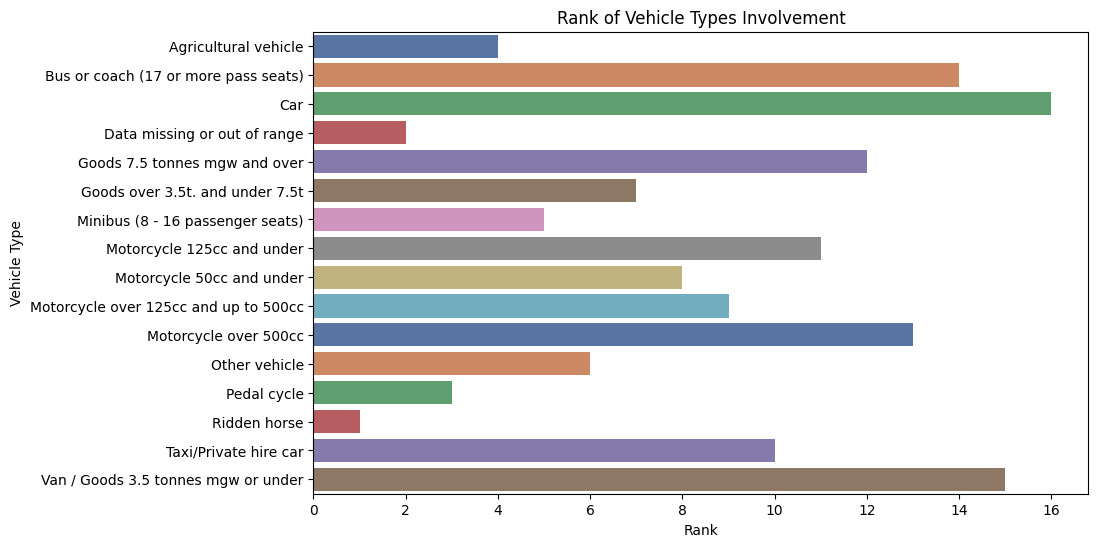

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corri.values, y=corri.index, palette="deep")

plt.title("Rank of Vehicle Types Involvement")
plt.xlabel("Rank")
plt.ylabel("Vehicle Type")

plt.show()